In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [38]:
df=pd.read_csv('./Datasets/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


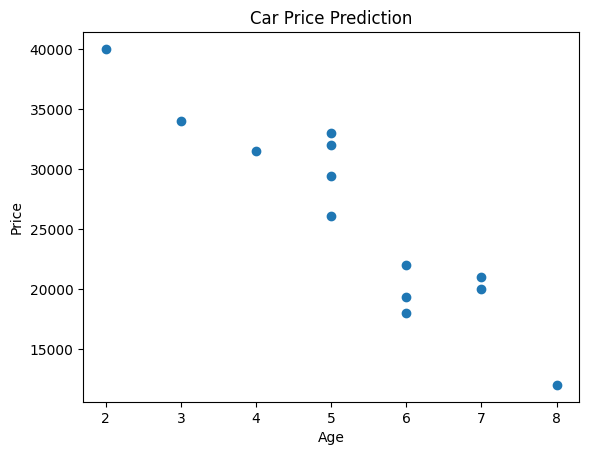

In [39]:
price=df[['Sell Price($)']].values
age=df[['Age(yrs)']].values

plt.scatter(age,price)
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Car Price Prediction')

plt.show()


In [45]:
le=LabelEncoder()
dfle=df
dfle['Car Model']=le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [63]:
X=dfle[['Car Model','Age(yrs)']].values
X

array([[1, 6],
       [1, 3],
       [1, 5],
       [1, 2],
       [1, 4],
       [0, 5],
       [0, 5],
       [0, 6],
       [0, 8],
       [2, 6],
       [2, 7],
       [2, 7],
       [2, 5]], dtype=int64)

In [64]:
Y=dfle[['Sell Price($)']].values
Y

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]], dtype=int64)

In [65]:
ct=ColumnTransformer([('Car Model',OneHotEncoder(),[0])],remainder='passthrough')

In [66]:
X=ct.fit_transform(X)
X

array([[0., 1., 0., 6.],
       [0., 1., 0., 3.],
       [0., 1., 0., 5.],
       [0., 1., 0., 2.],
       [0., 1., 0., 4.],
       [1., 0., 0., 5.],
       [1., 0., 0., 5.],
       [1., 0., 0., 6.],
       [1., 0., 0., 8.],
       [0., 0., 1., 6.],
       [0., 0., 1., 7.],
       [0., 0., 1., 7.],
       [0., 0., 1., 5.]])

In [67]:
Xe=X[:,1:]
Xe

array([[1., 0., 6.],
       [1., 0., 3.],
       [1., 0., 5.],
       [1., 0., 2.],
       [1., 0., 4.],
       [0., 0., 5.],
       [0., 0., 5.],
       [0., 0., 6.],
       [0., 0., 8.],
       [0., 1., 6.],
       [0., 1., 7.],
       [0., 1., 7.],
       [0., 1., 5.]])

In [68]:
model=LinearRegression()
model.fit(Xe,Y)

LinearRegression()

In [70]:
model.predict([[0,1,5]])
# 0 1 means Mercedes Benz C class

array([[31020.]])

In [71]:
model.predict([[0,0,5]])
# 0 0 means Audi A5

array([[28791.]])